In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,minmax_scale,PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Shape
print('Row',df.shape[0])
print('Column',df.shape[1])

Row 200
Column 5


In [4]:
# Get the Stastical information
df.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


# Observations:

* Age of the customers ranges from 18-70. This shows that the mall attracts has shops and things which suite all age group people.
* Average age of customers is 39.
* Average income of customers is 60 K$.
* Average spending score of customers is 50

 First step in any data science problem is to check for missing/null values. Let's just check that first.

In [5]:
df[df.isnull().any(axis=1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 As we know there are no missing values in this particular dataset.

In [7]:
# To check the datatype in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Visualisation

* Univariate Analysis

Female    56.0
Male      44.0
Name: Gender, dtype: float64


C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


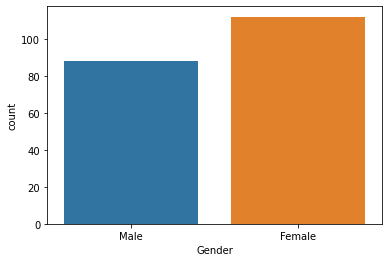

In [9]:
sns.countplot(df.Gender)
print(df['Gender'].value_counts()/df.shape[0]*100)

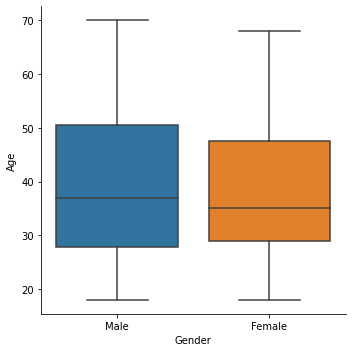

In [10]:
sns.catplot(x="Gender", y="Age", kind="box", data=df);

C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

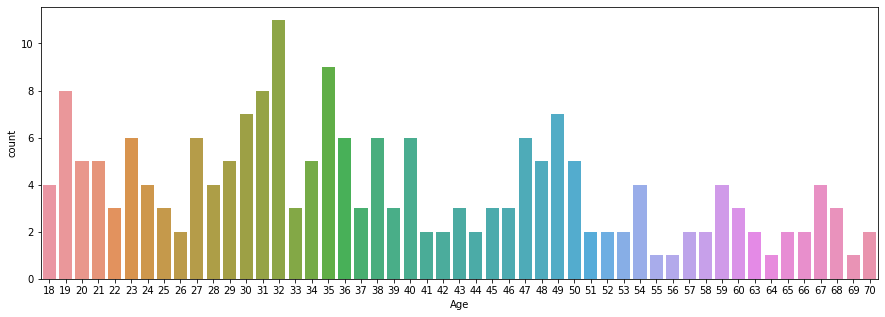

In [11]:
plt.figure(figsize=(15,5))
sns.countplot('Age',data=df)


C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

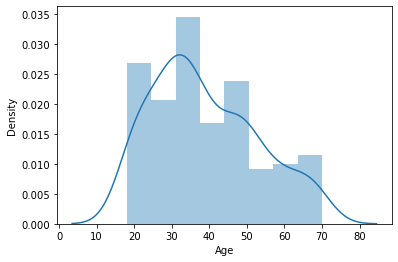

In [12]:
sns.distplot(df.Age)

Age of the customers also follows right skewed normal distrbution.



C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

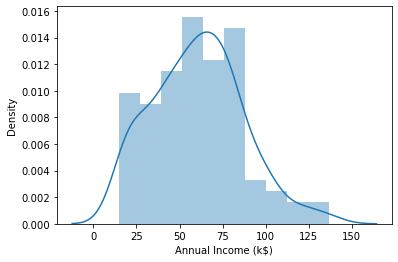

In [13]:
sns.distplot(df['Annual Income (k$)'])

Annual income of the customers also follows right skewed normal distrbution.



C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

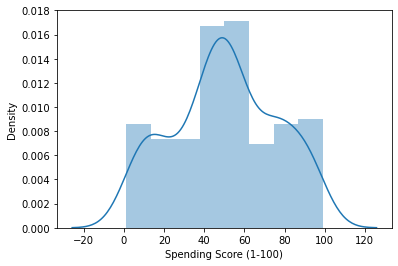

In [14]:
sns.distplot(df['Spending Score (1-100)'])

* Spending score of the customers also follows right skewed normal distrbution.


C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

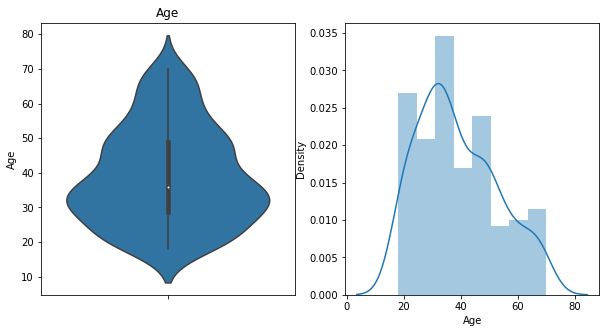

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.violinplot(y=df['Age'])
plt.title('Age')

plt.subplot(122)
sns.distplot(df['Age'])

* Bivariate Analysis

In [16]:
df.drop(columns=['CustomerID'],axis=0,inplace=True)

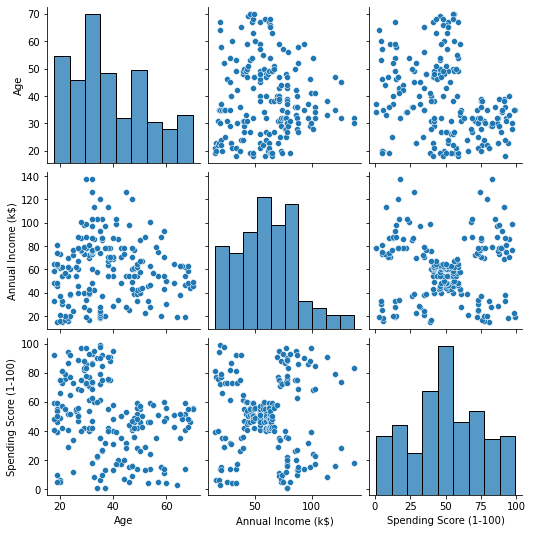

In [17]:
sns.pairplot(df)

* Observations:

* Most of the customers are in the 20-40 age group.
* Spending score is high for the customers in the age group of 20-40.
* Spending score is high for customers with very low and very high income.

<AxesSubplot:>

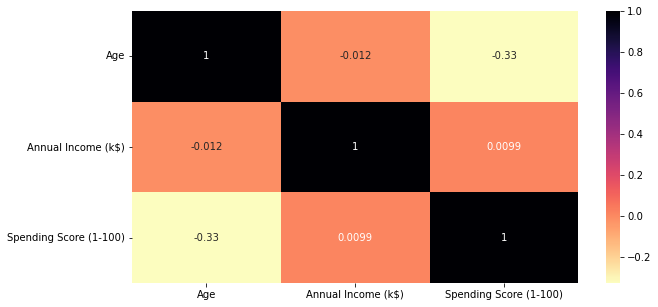

In [18]:
# correlation matrix
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(df.corr(),annot=True, cmap = 'magma_r')

In [1]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(10,5))
index=0
ax=ax.flatten()
for col,val in df.items():
    if col not in ['Gender']:
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout()

NameError: name 'plt' is not defined

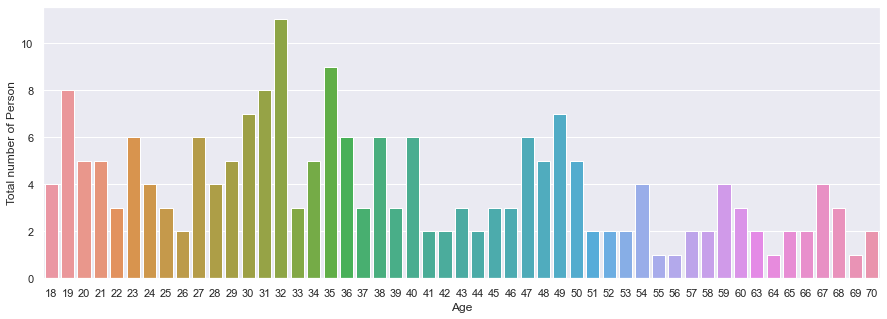

In [21]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(x=df.Age.value_counts().index,y=df.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Total number of Person')
plt.show()

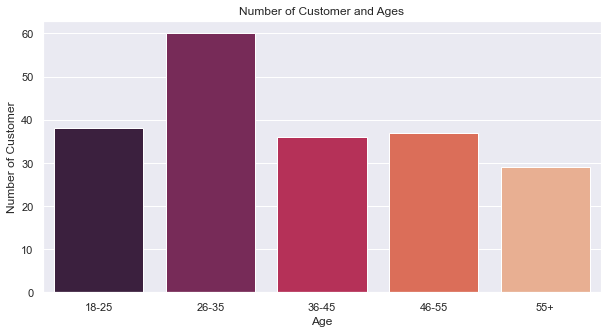

In [22]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

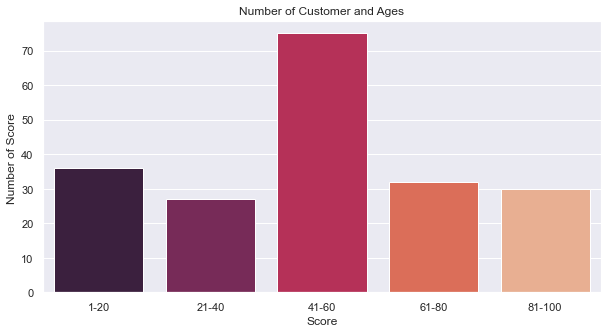

In [23]:
ss1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']<=20) &(df['Spending Score (1-100)']>=1)]
ss21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']<=40) &(df['Spending Score (1-100)']>=21)]
ss41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']<=60) &(df['Spending Score (1-100)']>=41)]
ss61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']<=80) &(df['Spending Score (1-100)']>=61)]
ss81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']<=100) &(df['Spending Score (1-100)']>=81)]


s_score_x=['1-20','21-40','41-60','61-80','81-100']
s_score_y=[len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=s_score_x, y=s_score_y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Score")
plt.ylabel("Number of Score ")
plt.show()


In [24]:
# label encoder categorical column conver to numerical

#df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Scaling using standard scalar

In [26]:
sc=StandardScaler()
X=sc.fit_transform(df)

# Cluster

C:\Users\NBALUDEO\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


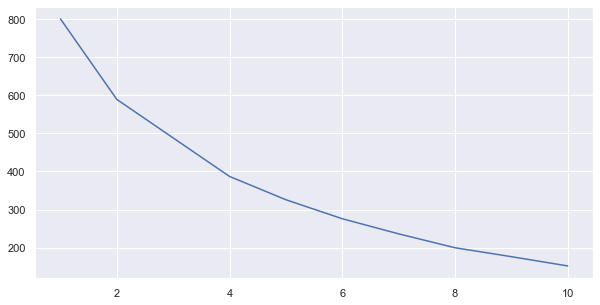

In [27]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
#plt.plot(x=range(1,11),y=wcss)


C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NBALUDEO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

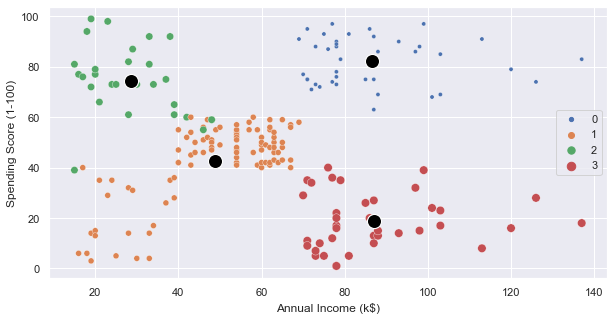

In [28]:
km=KMeans(n_clusters=4)
clusters=km.fit_predict(df)
df['label']=clusters
centroids=km.cluster_centers_


plt.figure(figsize=(10,5))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df.label,palette='deep',size=df.label)
sns.scatterplot(centroids[:,2],centroids[:,3],s=200,color='#000000')

In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,1


In [30]:
df['label'].unique()

array([2, 1, 0, 3])

<AxesSubplot:xlabel='label', ylabel='Spending Score (1-100)'>

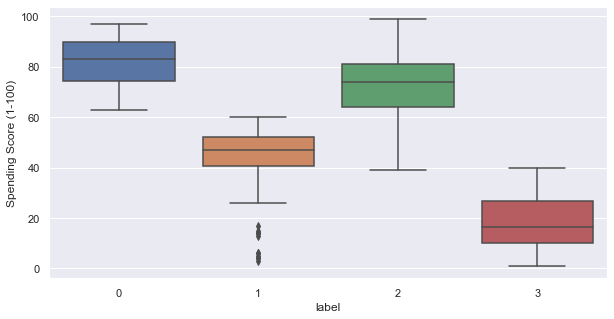

In [34]:
sns.boxplot(x='label',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='label', ylabel='Age'>

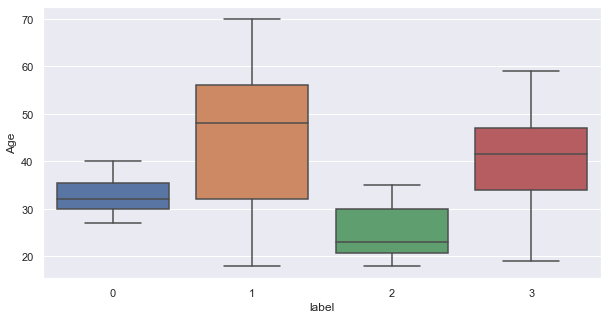

In [35]:
sns.boxplot(x='label',y='Age',data=df)

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

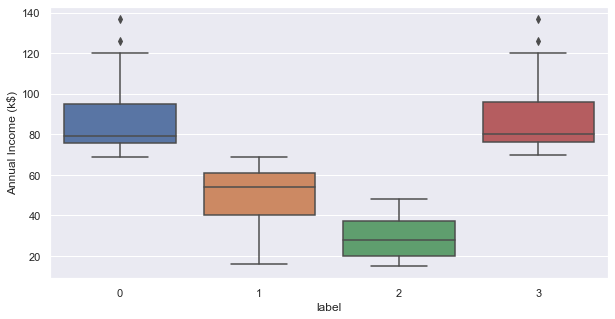

In [36]:
sns.boxplot(x='label',y='Annual Income (k$)',data=df)